### Ruth Maina

#### Applied Data Science - Predicting Calories Burned by the Human Body

A project on Predicting calories burned by the human body to help curb the obesity pandemic. Weight loss is directly correlated to calories burned thus the research findings would help shed light on high-ranking variables that potentially would be of highest impact than other variables, thus enlightening individuals on areas of focus A real life application scenario is presented.  




In [1]:
#import python libraries needed for data manipulation
options(warn = -1)

#### Data preparation

In [2]:
#Loading the dataset as a Pandas data frame.
df=pd.read_csv("exercise.csv")

In [4]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,10001159,female,67,176,74,12,103,39.6,76
1,10001607,female,34,178,79,19,96,40.6,93
2,10005485,female,38,178,77,14,82,40.5,49
3,10005630,female,39,169,66,8,90,39.6,36
4,10006441,male,23,169,73,25,102,40.7,122


In [5]:
#Drop the "Id" column  
df = df.drop('User_ID', axis=1)

In [6]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,female,67,176,74,12,103,39.6,76
1,female,34,178,79,19,96,40.6,93
2,female,38,178,77,14,82,40.5,49
3,female,39,169,66,8,90,39.6,36
4,male,23,169,73,25,102,40.7,122


#### Graphical analysis  

In [7]:
import seaborn as sb 

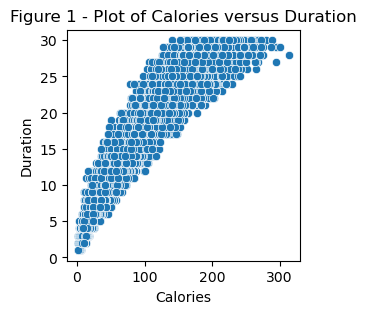

In [8]:
#linear relationship seen
plt.figure(figsize=(3,3))
plt.title("Figure 1 - Plot of Calories versus Duration")
sb.scatterplot(x=df['Calories'], y=df['Duration']) 
plt.show()

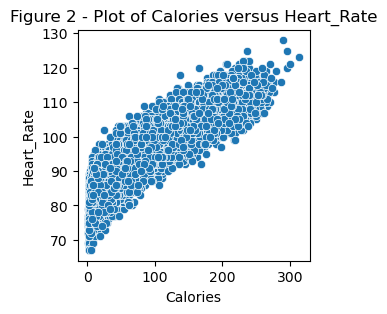

In [9]:
#linear relationship seen
plt.figure(figsize=(3,3))
plt.title("Figure 2 - Plot of Calories versus Heart_Rate")
sb.scatterplot(x=df['Calories'], y=df['Heart_Rate']) 
plt.show()

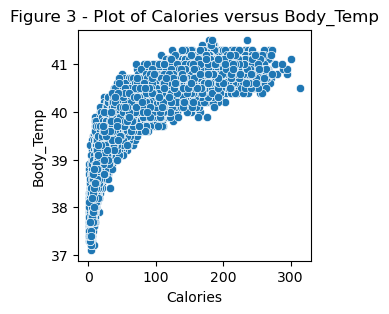

In [10]:
#linear relationship seen
plt.figure(figsize=(3,3))
plt.title("Figure 3 - Plot of Calories versus Body_Temp")
sb.scatterplot(x=df['Calories'], y=df['Body_Temp']) 
plt.show()

In [11]:
#check for missing data
df.isna().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
# Gender is a categorical variable thus will need dummy variables(it is binary as it has two possible values of male and female)

In [13]:
#confirm how many genders represented
df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [14]:
#create dummy variables
dummy_gender = pd.get_dummies(df['Gender'], prefix="Gender", drop_first=True)

In [15]:
#include the new dummy variables in original df
df = pd.concat([df, dummy_gender], axis=1)

In [16]:
#Drop original Gender column to avoid unecessary 'noise' since we now have dummy variables for the same
df = df.drop('Gender', axis=1)

In [17]:
df.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
0,67,176,74,12,103,39.6,76,0
1,34,178,79,19,96,40.6,93,0
2,38,178,77,14,82,40.5,49,0
3,39,169,66,8,90,39.6,36,0
4,23,169,73,25,102,40.7,122,1


In [18]:
#reconfirm how many genders represented
df['Gender_male'].value_counts()

0    7553
1    7447
Name: Gender_male, dtype: int64

In [19]:
#peek to view data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          15000 non-null  int64  
 1   Height       15000 non-null  int64  
 2   Weight       15000 non-null  int64  
 3   Duration     15000 non-null  int64  
 4   Heart_Rate   15000 non-null  int64  
 5   Body_Temp    15000 non-null  float64
 6   Calories     15000 non-null  int64  
 7   Gender_male  15000 non-null  uint8  
dtypes: float64(1), int64(6), uint8(1)
memory usage: 835.1 KB


In [20]:
#prep independent and dependent variables - define X and y features 
X=df.iloc[:, [0,1,2,3,4,5,7]]
y=df.iloc[:, 6]

In [21]:
print(X.shape,y.shape)

(15000, 7) (15000,)


In [22]:
X.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
0,67,176,74,12,103,39.6,0
1,34,178,79,19,96,40.6,0
2,38,178,77,14,82,40.5,0
3,39,169,66,8,90,39.6,0
4,23,169,73,25,102,40.7,1


In [23]:
y.head()

0     76
1     93
2     49
3     36
4    122
Name: Calories, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
# Create training and test split using 80% - 20% split: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [26]:
print(X_train.shape, X_test.shape ,y_train.shape, y_test.shape)

(12000, 7) (3000, 7) (12000,) (3000,)


In [27]:
#Need a scaler for standardization  

In [28]:
#create scaler object
scaler = StandardScaler() 

In [29]:
#fit training data
X_train = scaler.fit_transform(X_train)

In [30]:
#transform test data but not fit - to avoid leaking into the learning step
X_test = scaler.transform(X_test)

In [31]:
# Load additional library for model  
from sklearn.linear_model import LinearRegression

In [32]:
#LinearRegression model object
lr = LinearRegression()


In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
#prediction using training data 
y_pred_train = lr.predict(X_train)

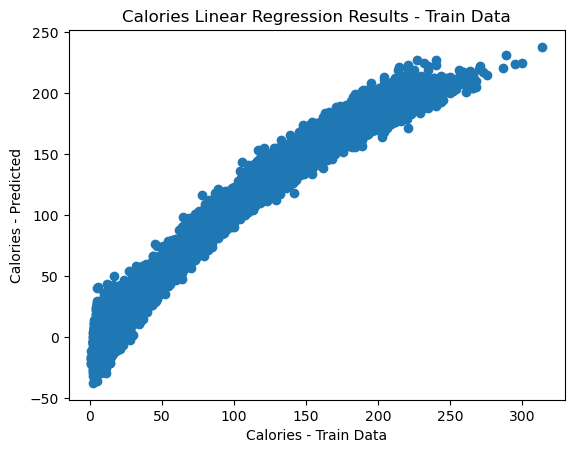

In [36]:
#plot to enable viewing of predictions against train data
#the diagonal shape/distribution of the data points is a good indication of the model learning the training data 
plt.scatter(y_train, y_pred_train)
plt.xlabel('Calories - Train Data')
plt.ylabel('Calories - Predicted')
plt.title('Calories Linear Regression Results - Train Data')
plt.show()

In [37]:
y_pred_test = lr.predict(X_test)

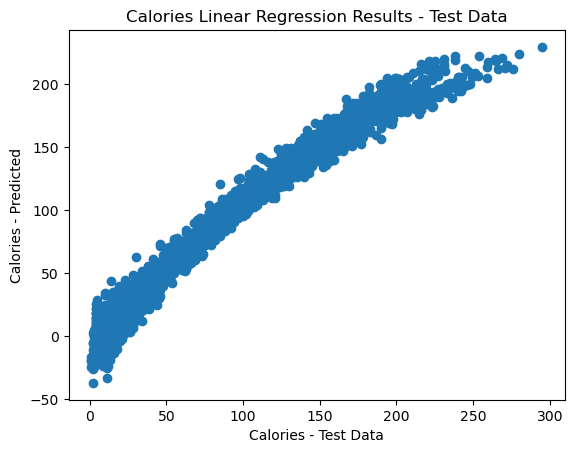

In [38]:
#plot to enable viewing of predictions against test data
#Similarly to the training data, the diagonal shape/distribution of the TEST data points is a good indication  
#of model performance in relation to unseen data  
plt.scatter(y_test, y_pred_test)
plt.xlabel('Calories - Test Data')
plt.ylabel('Calories - Predicted')
plt.title('Calories Linear Regression Results - Test Data')
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
#RMSE of the model predictions on the test set

In [41]:
rmse_lr = mean_squared_error(y_test, y_pred_test, squared=False)
rmse_lr

11.513485459111193

In [48]:
#confirm range of target variable to see if RMSE is within range
df.Calories.max()

314

In [49]:
df.Calories.min()

1

In [42]:
from sklearn.metrics import accuracy_score, r2_score, classification_report

In [43]:
#model r2score - training data
r2_score(y_train, y_pred_train)

0.9673281016117204

In [44]:
#model r2score - test data
r2_score(y_test, y_pred_test)

0.9666932103505418

#### Summary of findings (summarized better in the write up).

* R2 scores are high for the model at 96.73% and 96.67 indicating this is a good model 
* The R2 score of the training set is slightly better than the test set noted by the slightly higher percentage, indicating the train set sample yields better results than the test set  
* RMSE score of 11.51 is reasonable compared to the scale of the target variable range
* To improve the model predictive power, i might need to explore additional options such as scaling down/eliminating some features to only focus on the select few with the highest correlation.  
* Plot of predicted and actual values indicate the model is performing great: Plot of predicted training data versus actual indicate a linear relationship – the diagonal shape/distribution of the data points is a good indication of the model learning the training data very well.Plot of predicted test data versus actual also indicate a linear relationship – the diagonal shape/distribution of the data points is a good indication of the model performing very well in relation to unseen data (test data)


#### References: 
JHA, Muskan (2021,8.21). Calories Burnt Prediction. 
https://www.kaggle.com/code/muskanjha/calories-burnt-prediction/input

Pneumol, J. (2022 Nov 25). Linear and logistic regression models: when to use and how to interpret them? https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9747134/#:~:text=Linear%20regression%20is%20used%20for,or%20a%20mix%20of%20both. 

National Center for Health Statistics(n.d). Health, United States.
https://www.cdc.gov/nchs/hus/data-finder.htm.

IBM (2021, Dec 7). Linear regression. https://www.ibm.com/docs/el/spss-statistics/beta?topic=features-linear-regression 